<a href="https://colab.research.google.com/github/PALLAVI-web2002/predicting-coffee-sales-ml/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


Step 2: Load Your Data

In [2]:
# Load the dataset
data = pd.read_csv('/content/sample_data/netflix1.csv')

# Display the first 5 rows to take a quick look
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Step 3: Clean the Data

In [4]:
print("Missing values in each column:")
print(data.isnull().sum())


data['director'].fillna('Not Given', inplace=True)
# data['cast'].fillna('Not Given', inplace=True) # Removed this line
data['country'].fillna('Not Given', inplace=True)


data.dropna(subset=['date_added', 'rating'], inplace=True)


data['date_added'] = pd.to_datetime(data['date_added'])

print("Data cleaning completed!")

Missing values in each column:
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
Data cleaning completed!


/tmp/ipython-input-4080641050.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna('Not Given', inplace=True)
/tmp/ipython-input-4080641050.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Step 4: Explore with Simple Visualizations

/tmp/ipython-input-151066653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='pastel')


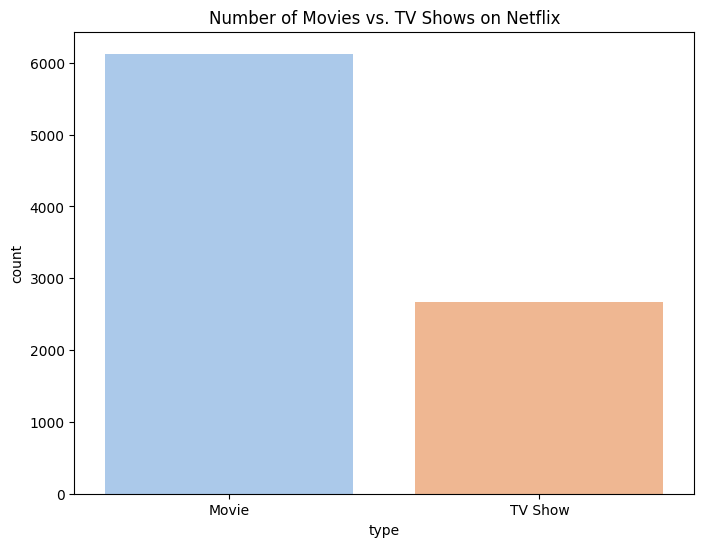

In [5]:
# Count the number of Movies and TV Shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data, palette='pastel')
plt.title('Number of Movies vs. TV Shows on Netflix')
plt.show()

/tmp/ipython-input-3463365426.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='dark:salmon_r')


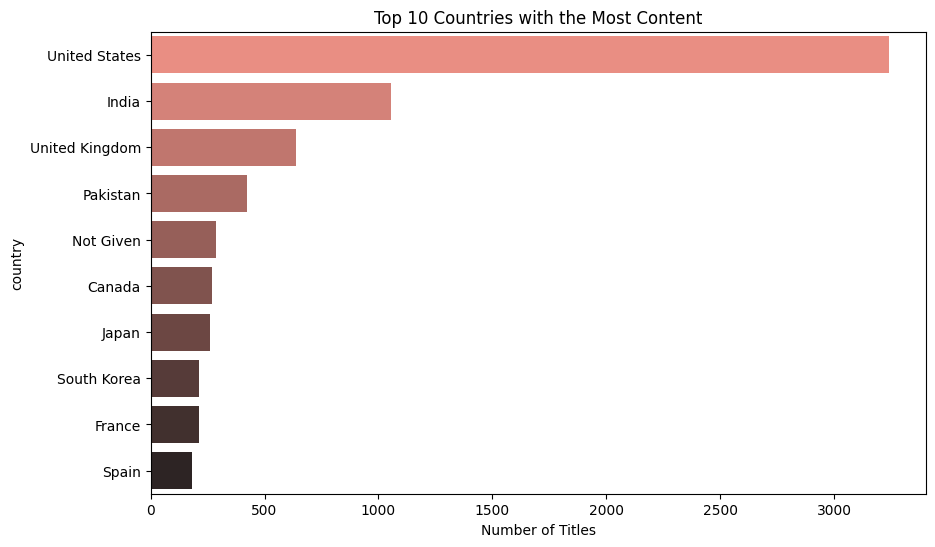

In [6]:
# Get the top 10 countries
top_countries = data['country'].value_counts().head(10)

# Plot them
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='dark:salmon_r')
plt.title('Top 10 Countries with the Most Content')
plt.xlabel('Number of Titles')
plt.show()

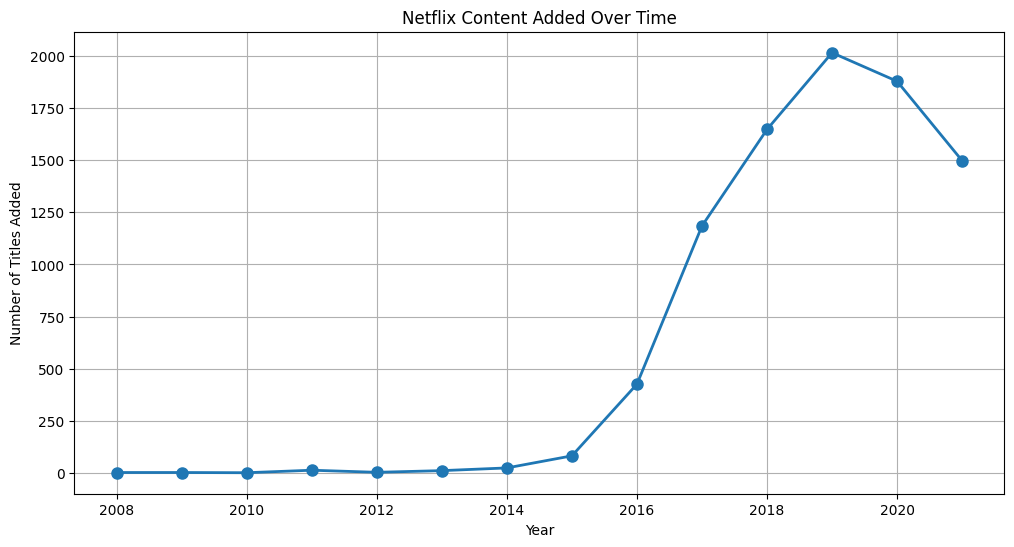

In [7]:
# Extract the year from the 'date_added' column
data['year_added'] = data['date_added'].dt.year

# Count how much content was added each year
yearly_data = data['year_added'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linewidth=2, markersize=8)
plt.title('Netflix Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

/tmp/ipython-input-3031686747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index, palette='Set3')


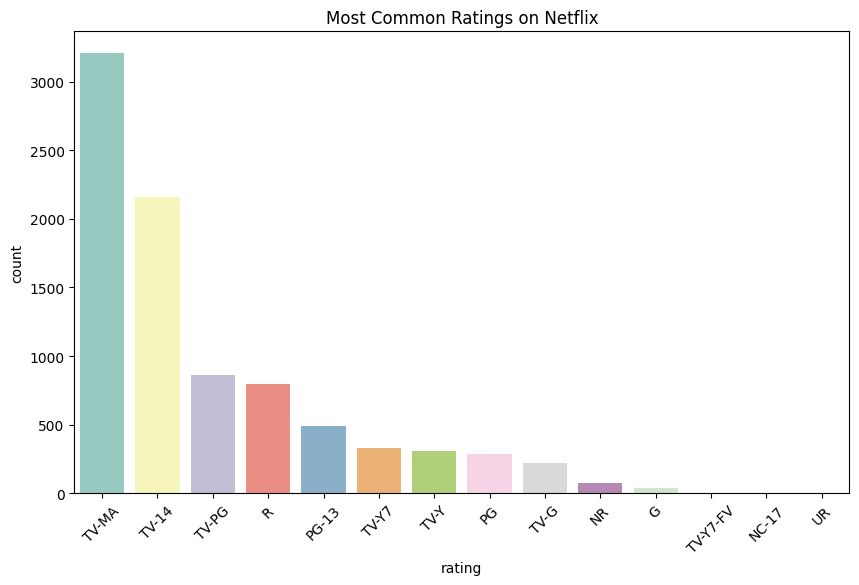

In [8]:
# Count the ratings
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='rating', data=data, order=data['rating'].value_counts().index, palette='Set3')
plt.title('Most Common Ratings on Netflix')
plt.xticks(rotation=45) # Rotate the labels so they don't overlap
plt.show()